In [27]:
import PyPDF2
import nltk
import re
import numpy as np
from PyPDF2 import PdfFileWriter, PdfFileReader
from nltk import sent_tokenize,word_tokenize
from nltk.tokenize  import word_tokenize,sent_tokenize
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.probability import FreqDist
from string import punctuation
from nltk.corpus import stopwords
from nltk.text import Text
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [28]:
# importing of regulation pdf
text=PdfFileReader(open(r"C:\Users\admin\Desktop\Threat_intel_services\information\sources_pdf\Carbanak_APT_eng.pdf",'rb'))

In [29]:
# function to extract text from all pages
def story(x):
    page=[]
    for i in  range(0,x.numPages):
        pages=x.getPage(i) 
        story=pages.extractText() 
        k= ' '.join (story.split())
        page.append(k)
    return page

In [30]:
# removing special symbols
def remove_spl(data):
    new=[]
    for i in range(text.numPages):
        #print(i)
        p=re.sub('[ﬁ,ﬂ]',' ',data[i])
        #print(p)
        #p=re.sub('[;,:]','.',data[i])
        new.append(p)
    return(new)

In [31]:
raw=story(text)
#raw=remove_spl(raw)

In [32]:
raw

['Version 2.1 February, 2015 CARBANAK APT THE GREAT BANK ROBBERY #TheSAS2015 #Carbanak',
 '2Table of contents 1. Executive Summary ...........................................................................................32. Analysis ...............................................................................................................52.1 Infection and Transmission ........................................................................52.2 Malware Analysis Œ Backdoor.Win32.Carbanak ......................................72.3 Lateral movement tools ..........................................................................182.4 Command and Control (C2) Servers .......................................................193. Conclusions .....................................................................................................23APPENDIX 1: C2 protocol decoders ....................................................................24APPENDIX 2: BAT ˜le to detect infection .....

In [33]:
for i in raw:
    print(i)

Version 2.1 February, 2015 CARBANAK APT THE GREAT BANK ROBBERY #TheSAS2015 #Carbanak
2Table of contents 1. Executive Summary ...........................................................................................32. Analysis ...............................................................................................................52.1 Infection and Transmission ........................................................................52.2 Malware Analysis Œ Backdoor.Win32.Carbanak ......................................72.3 Lateral movement tools ..........................................................................182.4 Command and Control (C2) Servers .......................................................193. Conclusions .....................................................................................................23APPENDIX 1: C2 protocol decoders ....................................................................24APPENDIX 2: BAT ˜le to detect infection ...........

In [37]:
d=[]
for i in raw:
    a=sent_tokenize(i)
    for j in a:
        if len(j)>1:
            d.append(j)

In [50]:
import spacy
from spacy.lang.en import English
from spacy.pipeline import EntityRuler


nlp = spacy.load('en_core_web_sm')
new_ruler = EntityRuler(nlp).from_disk(r"C:\Users\admin\Desktop\Threat_intel_services\NER\SPACY\rule_corpus.jsonl")
#new_ruler1 = EntityRuler(nlp).from_disk("malware_corpus.jsonl")

In [51]:
nlp.add_pipe(new_ruler)
#nlp.add_pipe(new_ruler1)

In [55]:
result=[]
for sent1 in d:
    doc1=nlp(sent1)
    result.append([(sent1,ent.text, ent.label_) for ent in doc1.ents if ent.label_=='threat_group'])

In [56]:
result=[i for i in result if len(i)>0]

In [60]:
df=pd.DataFrame({'Description':d})

In [62]:
norp_main=[]
malware_main=[]
threat_main=[]
date_main=[]
text=[]
ID=[]
org_main=[]
sector_main=[]
for i in df.iterrows():
    text.append(i[1]['Description'])
    #ID.append(i[1]['ID'])
    doc=nlp(i[1]['Description'])
    norp=[]
    malware=[]
    threat=[]
    date=[]
    org=[]
    sector=[]
    for ent in doc.ents:
        if (ent.label_=='NORP') | (ent.label_=='GPE'):
            norp.append(ent.text)
        if ent.label_=='MALWARE':
            malware.append(ent.text)
        if ent.label_=='threat_group':
            threat.append(ent.text)
        if ent.label_=='ORG':
            org.append(ent.text)
        if ent.label_=='DATE':
            date.append(ent.text)
        if ent.label_=='sector':
            sector.append(ent.text)
        
    norp_main.append(norp)
    malware_main.append(malware)
    threat_main.append(threat)
    date_main.append(date)
    org_main.append(org)
    sector_main.append(sector)

In [66]:
len(malware_main)

225

In [69]:
results=pd.DataFrame({'Description':text,'Country':norp_main,'Threat_group':threat_main,'Malware':malware_main,'Date':date_main,'Organisation':org_main,'Sectors':sector_main})

In [75]:
results.iloc[100]['Description']

'7C6A8A5update Malware update.'

In [83]:
results['Description'][220]

'37e742242f28842480e5c2b3357b7fd6ab e938f73a10e3d2afbd77dd8ecb3a3854 eaee5bf17195a03d6bf7189965ee1bdb ef8e417e5adb2366a3279d6680c3b979 f4eddae1c0b40bfedeb89e814a2267a5 f66992766d8f9204551b3c42336b4f6d fad3a7ea0a0c6cb8e20e43667f560d7f fbc310a9c431577f3489237d48763eea ff7fd55796fa66c8245c0b90157c57c7 100d516821d99b09718b362d5a4b9a2f 6ae1bb06d10f253116925371c8e3e74b72eff79f772b4c910259e3716f1acf49 85a26581f9aadeaa6415c01de60f932d9ad6e0db5e2f6b59f14dd55ded057b69 a70fea1e6eaa77bdfa07848712efa259be935b4b3c620558422093d643e2edfec70cce41ef0e4a206b5b48fa2d460ba441fb85acedc691bc6033fa2c4cf6a0bc 1684a5eafd51852c43b4bca48b58980f08f83d98b18d3dff16c35a20e24ed49a'

In [36]:
sent=[]
for j in raw:
    for i in j:
        if (len(i)>1) & (i!='.') & (i!=' '):
            sent.append(sent_tokenize(i))

2019ThreatReport
ContentsExecutive Summary . . . . . . . . . . . . . . . . . . . . . . . .3A Look Back at Cylance's Successful Predictions from Last Year's Report . . . . . . . . . . . .4Methodology. . . . . . . . . . . . . . . . . . . . . . . . . . . . .4What Is Predictive Advantage (PA)? . . . . . . . . . . . . . 4New To This Year's Report: Execution  Identity  and DoS (E:I:D) Ratings . . . . . . . . . . . . . . 5Key Findings . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 5Top Malware . . . . . . . . . . . . . . . . . . . . . . . . . . . . .6Top 10 Windows Threats . . . . . . . . . . . . . . . . . . . . .7MyWebSearch . . . . . . . . . . . . . . . . . . . . . . . . . . . . 7InstallCore . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 8PolyRansom . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 8Neshta. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .9Upatre . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 10Ramnit. . . . . .

In [78]:
import re

In [34]:
sent

[]

In [203]:
sent=([sent for sent in sent_tokenize(str(raw))])
for j in range(text.numPages):
    k='Bureau of Cannabis Control Regular Regulations Text Page' + ' '+ str(j) +' '+'of' + ' '+'136'
    for i in range(len(sent)):                    
        if k in sent[i]:
            sent[i]= sent[i].replace(k,' ') 

In [226]:
sent

["['  BUREAU OF CANNABIS CONTROL PROPOSED TEXT OF REGULATIONS CALIFORNIA CODE OF REGULATIONS TITLE 16 DIVISION 42.",
 'BUREAU OF CANNABIS CONTROL All of the proposed text sections and documents incorporated by reference are proposed to be added to the California Code of Regulation s under Division 42 of Title 16: Chapter 1.',
 'ALL BUREAU LICENSEES Article 1.',
 'Division Definitions § 5000.',
 'Definitions For the purposes of this division  the definitions in this section shall govern the construction of this division unless otherwise indicated.',
 '(a)  Act  means the Medicinal and Adult -Use Cannabis Regulation and Safety Act.',
 '(b)  Bureau  means the Bureau of Cannabis Control  previously named the B ureau of Marijuana Control  Bureau of Medical Cannabis Regulation  and Bureau of Medical Marijuana Regulation.',
 '(c)  Cannabis accessories  has the same meaning as in Health and Safety Code s ection 11018.2.',
 '(d)  Cannabis goods  means cannabis  including drie d flower  and prod

In [223]:
c1=[]
for i in range(len(sent)):
    if 'Chapter 2.' not in sent[i]:
        a=sent[i]
        c1.append(a)
    else: 
        break

In [227]:
c1

["['  BUREAU OF CANNABIS CONTROL PROPOSED TEXT OF REGULATIONS CALIFORNIA CODE OF REGULATIONS TITLE 16 DIVISION 42.",
 'BUREAU OF CANNABIS CONTROL All of the proposed text sections and documents incorporated by reference are proposed to be added to the California Code of Regulation s under Division 42 of Title 16: Chapter 1.',
 'ALL BUREAU LICENSEES Article 1.',
 'Division Definitions § 5000.',
 'Definitions For the purposes of this division  the definitions in this section shall govern the construction of this division unless otherwise indicated.',
 '(a)  Act  means the Medicinal and Adult -Use Cannabis Regulation and Safety Act.',
 '(b)  Bureau  means the Bureau of Cannabis Control  previously named the B ureau of Marijuana Control  Bureau of Medical Cannabis Regulation  and Bureau of Medical Marijuana Regulation.',
 '(c)  Cannabis accessories  has the same meaning as in Health and Safety Code s ection 11018.2.',
 '(d)  Cannabis goods  means cannabis  including drie d flower  and prod

In [224]:
for i in range(len(c1)):
    if Article in c1[i]:
        

SyntaxError: unexpected EOF while parsing (<ipython-input-224-97f6a97841b6>, line 3)

In [225]:
c1

["['  BUREAU OF CANNABIS CONTROL PROPOSED TEXT OF REGULATIONS CALIFORNIA CODE OF REGULATIONS TITLE 16 DIVISION 42.",
 'BUREAU OF CANNABIS CONTROL All of the proposed text sections and documents incorporated by reference are proposed to be added to the California Code of Regulation s under Division 42 of Title 16: Chapter 1.',
 'ALL BUREAU LICENSEES Article 1.',
 'Division Definitions § 5000.',
 'Definitions For the purposes of this division  the definitions in this section shall govern the construction of this division unless otherwise indicated.',
 '(a)  Act  means the Medicinal and Adult -Use Cannabis Regulation and Safety Act.',
 '(b)  Bureau  means the Bureau of Cannabis Control  previously named the B ureau of Marijuana Control  Bureau of Medical Cannabis Regulation  and Bureau of Medical Marijuana Regulation.',
 '(c)  Cannabis accessories  has the same meaning as in Health and Safety Code s ection 11018.2.',
 '(d)  Cannabis goods  means cannabis  including drie d flower  and prod

In [72]:
data=[w for sent in sent_tokenize(data) for w in word_tokenize(sent)]

In [123]:
data[35:45]

['proposed',
 'text',
 'sections',
 'and',
 'documents',
 'incorporated',
 'by',
 'reference',
 'are',
 'proposed']

In [125]:
sorted([w for w in set(data) if w.islower() & w.endswith(('abis','he','osed','xt'))])

['cannabis', 'proposed', 'text', 'the']

In [134]:
k=sorted([w for w in set(data) if w.isdigit()])
if k=='5054':
    print(k)

In [145]:
for i in range(len(k)):
    #print(i)
    if k[i]=='5054' & k[i].endswith('4'):
        print(k[i]))

SyntaxError: invalid syntax (<ipython-input-145-2b2f7c0c184b>, line 4)

In [141]:
k

['1', '136', '16', '40141', '42', '5000', '5054', '5055']

In [74]:
data1 = nltk.Text(data)

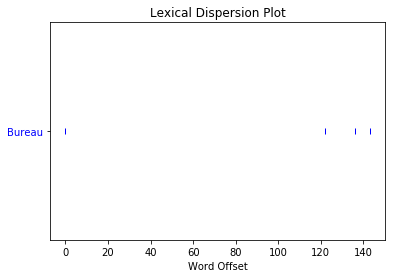

In [78]:
data1.dispersion_plot(["Bureau"])

In [104]:
k=(FreqDist(data1))

In [105]:
r=[]
p=[]
for i,j in k.items():
    r.append(i)
    p.append(j)

In [107]:
df1=pd.DataFrame(r,p)

In [108]:
df1.reset_index(inplace=True)

In [112]:
df1.sort_values('index',ascending=False).head()

,index,0
1,16,of
23,15,.
25,14,the
29,13,and
67,12,(
